In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['cyan'])
# # plt.rcParams['image.cmap'] = 'hsv'


# plt.rcParams["axes.prop_cycle"]

In [3]:
df_org = pd.read_csv('loan_approval_dataset_nullvalues.csv')

In [4]:
df = df_org.copy()
df.head()

loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2            NaN            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3            NaN            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                 2400000.0   
1     12200000          8          417                       NaN   
2     29700000         20          506                 7100000.0   
3     30700000          8          467                18200000.0   
4     24200000         20          382                12400000.0   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0               17600000.0                  NaN         8000000.0    Approved  
1                2200000.0            8800000.0         3300000.0    Rejected  
2                      NaN           33300000.0        12800000.0    Rejected  
3                3300000.0           23300000.0         7900000.0    Rejected  
4                8200000.0           29400000.0         5000000.0    Rejected

In [5]:
df.shape

(4269, 13)

# Exploratory Data Analysis

<b>Exploratory Data Analysis (EDA)</b> is a crucial phase in the data analysis process for both data analysts and data scientists. It involves the initial examination and exploration of a dataset to summarize its main characteristics, identify patterns, uncover relationships, and detect outliers or anomalies. The primary objectives of EDA are to gain insights into the underlying structure of the data, generate hypotheses, and inform the selection of appropriate statistical or machine learning techniques for further analysis.

<b>Key components of Exploratory Data Analysis include:</b>

<b>1. Descriptive Statistics:</b> Calculating and summarizing key statistical measures such as mean, median, mode, standard deviation, and quartiles to describe the central tendency and spread of the data.

<b>2. Data Visualization:</b> Creating visual representations of the data using charts, graphs, histograms, scatter plots, and other visualization techniques to better understand the distribution and relationships within the dataset.

<b>3. Data Cleaning:</b> Identifying and handling <b><i>missing values</i></b>, <b><i>outliers</i></b>, or <b><i>inconsistencies</i></b> in the data to ensure its quality and reliability for further analysis.

<b>4. Distribution Analysis:</b> Examining the distribution of individual variables to understand their characteristics, such as skewness or kurtosis.

<b>5. Correlation and Relationships:</b> Exploring the relationships between different variables through correlation analysis, scatter plots, or other methods to identify potential patterns or trends.

<b>6. Feature Engineering:</b> Deriving new features or transforming existing ones to enhance the dataset and improve the performance of machine learning models.

<b>7. Hypothesis Testing:</b> Formulating and testing initial hypotheses about the data to guide subsequent analyses and model building.



> ### *Refer to this [article](https://www.leewayhertz.com/what-is-exploratory-data-analysis/) for more detailed insight.*

====================================================================================================================================

# <center>Understanding the statisitcs 

In [6]:
df.head(10)

loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2            NaN            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3            NaN            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   
5        6                 0       Graduate           Yes       4800000   
6        7                 5       Graduate            No       8700000   
7        8                 2       Graduate           Yes       5700000   
8        9                 0       Graduate           Yes        800000   
9       10                 5            NaN           NaN       1100000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                 2400000.0   
1     12200000          8          417                       NaN   
2     29700000         20          506                 7100000.0   
3     30700000          8          467                18200000.0   
4     24200000         20          382                12400000.0   
5     13500000         10          319                 6800000.0   
6     33000000          4          678                22500000.0   
7     15000000         20          382                       NaN   
8      2200000         20          782                 1300000.0   
9      4300000         10          388                 3200000.0   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0               17600000.0                  NaN         8000000.0    Approved  
1                2200000.0            8800000.0         3300000.0    Rejected  
2                      NaN           33300000.0        12800000.0    Rejected  
3                3300000.0           23300000.0         7900000.0    Rejected  
4                8200000.0           29400000.0         5000000.0    Rejected  
5                8300000.0           13700000.0         5100000.0    Rejected  
6               14800000.0           29200000.0         4300000.0    Approved  
7                5700000.0           11800000.0         6000000.0    Rejected  
8                 800000.0            2800000.0          600000.0    Approved  
9                1400000.0            3300000.0         1600000.0    Rejected

1. the first column is redundant and can be dropped.

2. the columns for amounts can be scaled down for better understanding

In [7]:
df.drop('loan_id',axis = 1,inplace=True)

In [8]:
df.head()

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2            NaN            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3            NaN            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                 2400000.0               17600000.0   
1          8          417                       NaN                2200000.0   
2         20          506                 7100000.0                      NaN   
3          8          467                18200000.0                3300000.0   
4         20          382                12400000.0                8200000.0   

   luxury_assets_value  bank_asset_value loan_status  
0                  NaN         8000000.0    Approved  
1            8800000.0         3300000.0    Rejected  
2           33300000.0        12800000.0    Rejected  
3           23300000.0         7900000.0    Rejected  
4           29400000.0         5000000.0    Rejected

In [9]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [10]:
df.shape

(4269, 12)

We have almost 4200 rows and 12 columns. We need to see what are the types of data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 3629 non-null   object 
 2   self_employed             3928 non-null   object 
 3   income_annum              4269 non-null   int64  
 4   loan_amount               4269 non-null   int64  
 5   loan_term                 4269 non-null   int64  
 6   cibil_score               4269 non-null   int64  
 7   residential_assets_value  3885 non-null   float64
 8   commercial_assets_value   4141 non-null   float64
 9   luxury_assets_value       4013 non-null   float64
 10  bank_asset_value          3843 non-null   float64
 11  loan_status               4269 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 400.3+ KB


<h3 style="color:white"> dtypes: integers: (9), object/strings: (3)

In [12]:
df.describe()

no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              3.885000e+03             4.141000e+03         4.013000e+03   
mean               7.471197e+06             4.974934e+06         1.509556e+07   
std                6.513098e+06             4.377911e+06         9.128965e+06   
min               -1.000000e+05             0.000000e+00         3.000000e+05   
25%                2.200000e+06             1.300000e+06         7.500000e+06   
50%                5.600000e+06             3.700000e+06         1.450000e+07   
75%                1.130000e+07             7.600000e+06         2.170000e+07   
max                2.910000e+07             1.940000e+07         3.920000e+07   

       bank_asset_value  
count      3.843000e+03  
mean       4.960161e+06  
std        3.229474e+06  
min        0.000000e+00  
25%        2.300000e+06  
50%        4.600000e+06  
75%        7.100000e+06  
max        1.470000e+07

<h3 style="color:white"> Not readable yet, scaling is required

In [13]:
# Null values:
df.isnull().sum()

no_of_dependents              0
education                   640
self_employed               341
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
loan_status                   0
dtype: int64

In [14]:
# percentage of missing values:

round(df.isnull().mean()*100,2)

no_of_dependents             0.00
education                   14.99
self_employed                7.99
income_annum                 0.00
loan_amount                  0.00
loan_term                    0.00
cibil_score                  0.00
residential_assets_value     9.00
commercial_assets_value      3.00
luxury_assets_value          6.00
bank_asset_value             9.98
loan_status                  0.00
dtype: float64

# <h1 style='color:black'>Types of Analysis:
    
<h3 style='color:black'>
1. Univariate Analysis
<h3 style='color:black'>   
2. Multi-variate Analysis
    </h3>
=========================================

In [49]:
df['residential_assets_value'].dtypes

dtype('float64')

In [16]:
numerical = []
categorical =[]
for col in df.columns:
  if df[col].dtypes=='O':
    categorical.append(col)
  else:
    numerical.append(col)

In [17]:
print(numerical)
print()
print(categorical)

['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

['education', 'self_employed', 'loan_status']


In [18]:
df['education'].value_counts()

education
Not Graduate    1819
Graduate        1810
Name: count, dtype: int64

In [19]:
df['education'].unique()

array([nan, ' Not Graduate', ' Graduate'], dtype=object)

In [20]:
df['education'].nunique()

2

In [21]:
df['education'].value_counts().index

Index([' Not Graduate', ' Graduate'], dtype='object', name='education')

In [22]:
for col in categorical:
  print(df[col].value_counts())
print('-'*20)

education
Not Graduate    1819
Graduate        1810
Name: count, dtype: int64
self_employed
Yes    1977
No     1951
Name: count, dtype: int64
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
--------------------


<Axes: xlabel='loan_status', ylabel='count'>

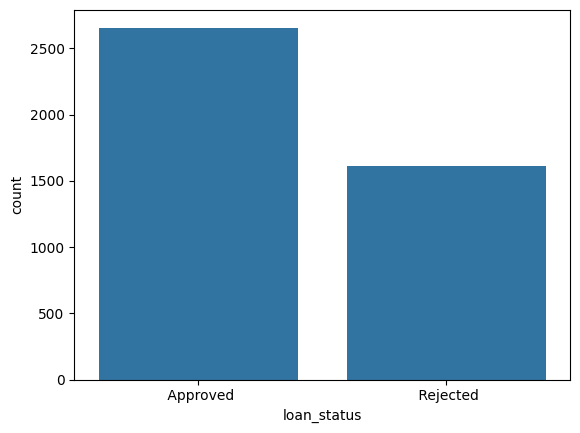

In [23]:
sns.countplot(df,x='loan_status')

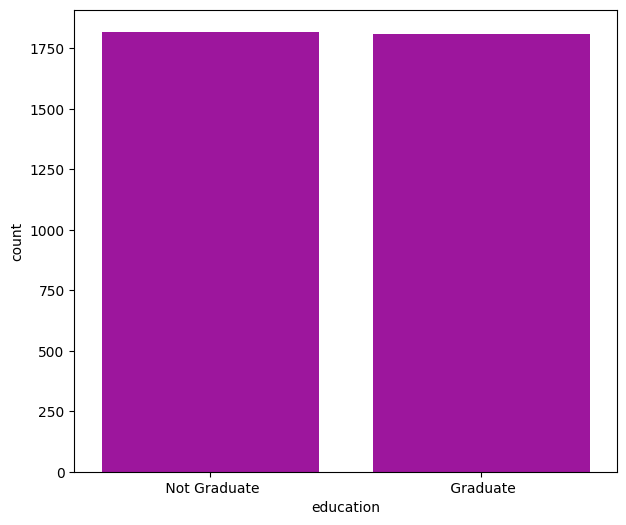

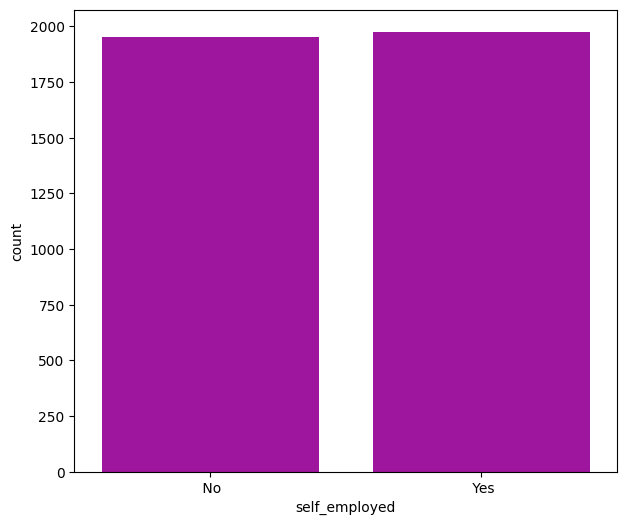

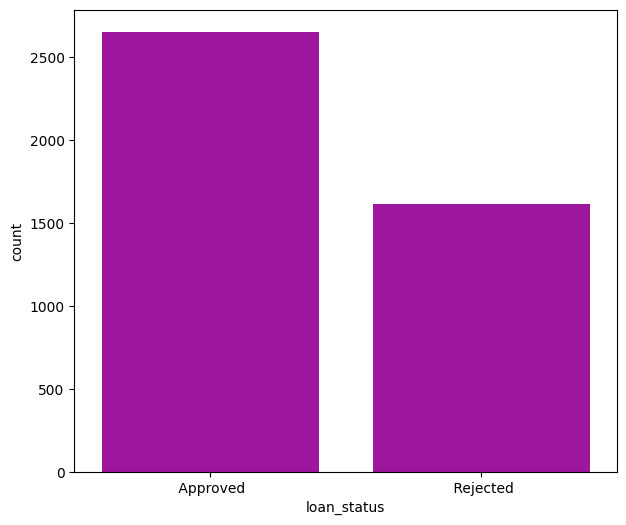

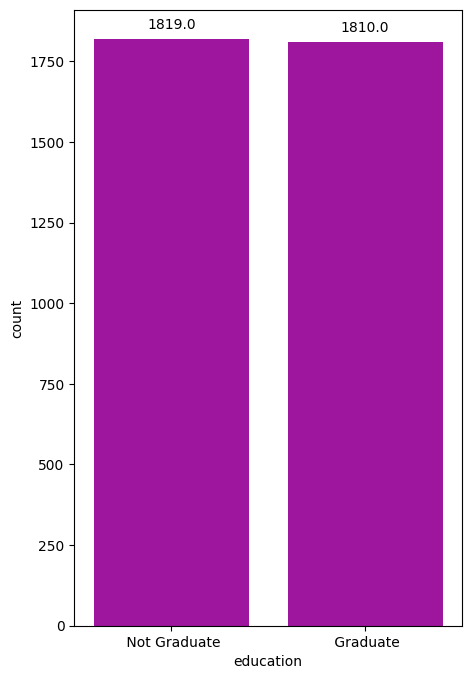

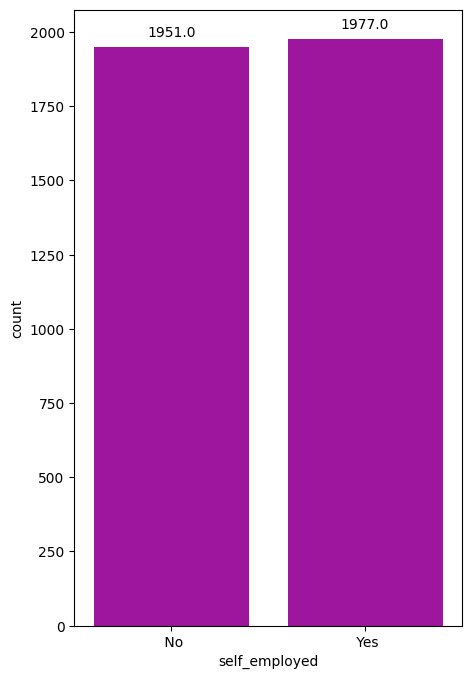

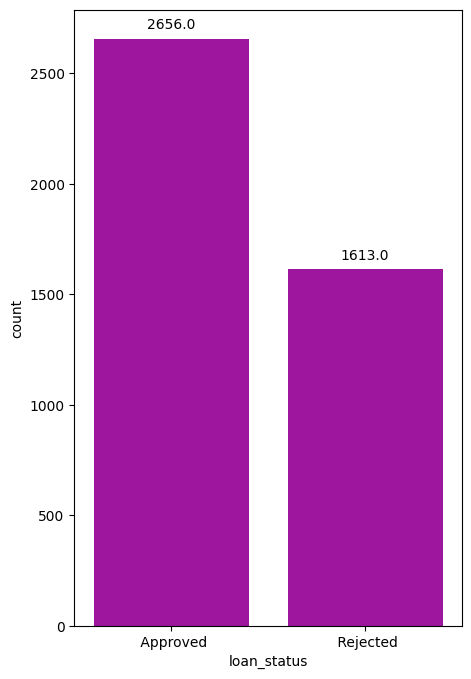

In [24]:
for col in  categorical:
  plt.figure(figsize = (7,6))
  sns.countplot(df,x=col,color="#b300b3")
for col in categorical:
    
    plt.figure(figsize=(5,8))
    ax = sns.countplot(df,x=col,color='#b300b3')
    
    
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.show()
    



In [25]:
col

'loan_status'

In [26]:
df['education'].value_counts()

education
Not Graduate    1819
Graduate        1810
Name: count, dtype: int64

In [27]:
index_label = df['education'].value_counts().index

In [28]:
values = df['education'].value_counts().values

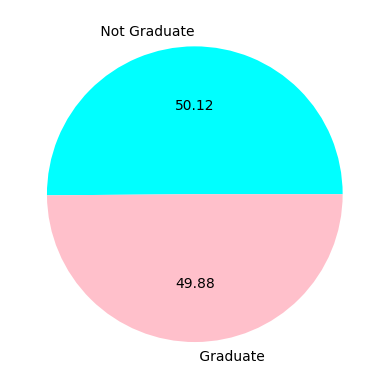

In [29]:
plt.pie(x=values,labels = index_label,autopct = '%.2f',colors = ['cyan','pink'])
plt.show()

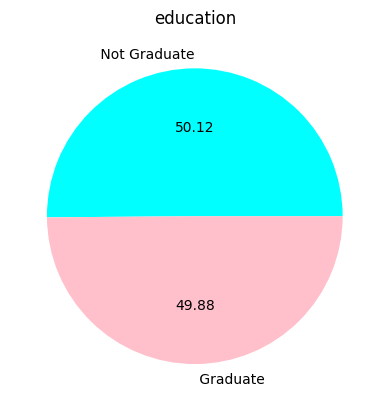

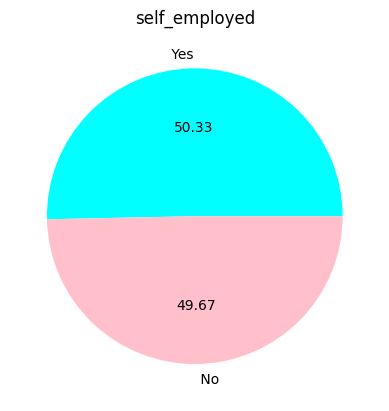

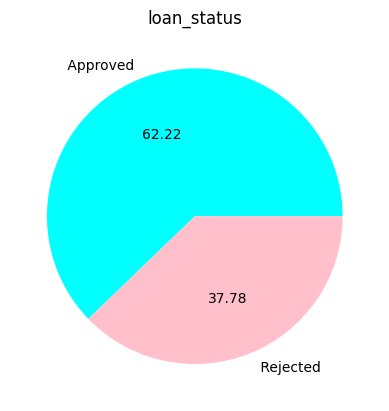

In [30]:
for col in categorical:
    df[col].value_counts()

    index_label = df[col].value_counts().index

    values = df[col].value_counts().values

    plt.pie(x=values,labels=index_label,autopct='%.2f',colors = ['cyan','pink'])
    plt.title(col)

    plt.show()

* Imabalanced target column

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12584\1169715451.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#b300b3'` for the same effect.

  ax = sns.countplot(df,x='loan_status',color="#b300b3", hue = 'education')


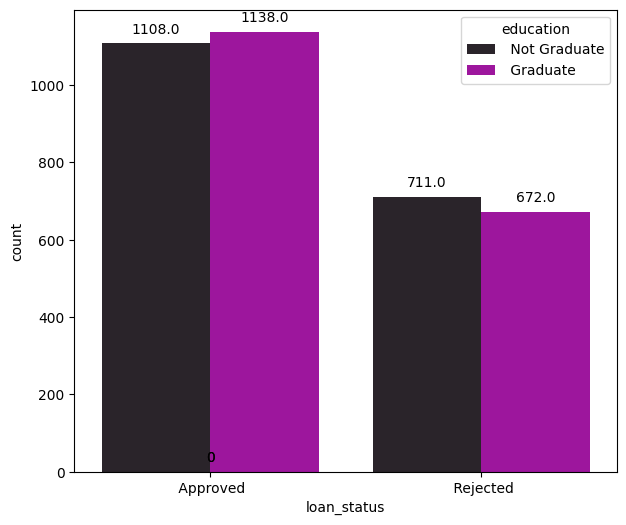

In [31]:
plt.figure(figsize = (7,6))
ax = sns.countplot(df,x='loan_status',color="#b300b3", hue = 'education')


for p in ax.patches:
       ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2.,p.get_height()),
                   ha = 'center', va = 'center', xytext = (0,10),textcoords = 'offset points')
plt.show()

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12584\3692110329.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#b300b3'` for the same effect.

  ax = sns.countplot(df,x='education',color="#b300b3", hue = 'loan_status')


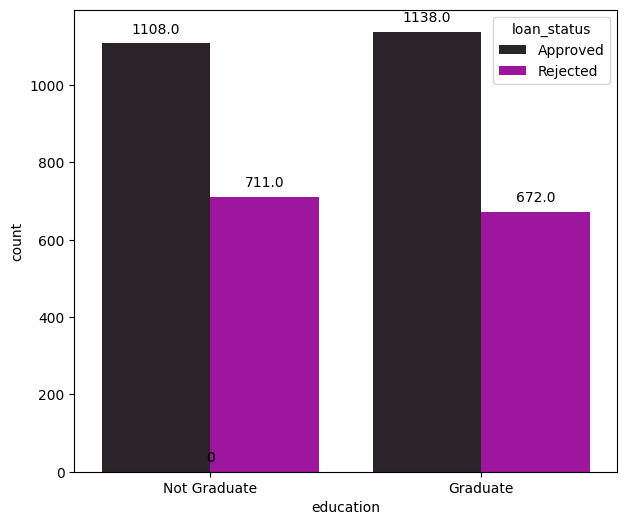

In [48]:
plt.figure(figsize = (7,6))
ax = sns.countplot(df,x='education',color="#b300b3", hue = 'loan_status')


for p in ax.patches:
       ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2.,p.get_height()),
                   ha = 'center', va = 'center', xytext = (0,10),textcoords = 'offset points')
plt.show()

In [33]:
df.head()

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2            NaN            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3            NaN            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                 2400000.0               17600000.0   
1          8          417                       NaN                2200000.0   
2         20          506                 7100000.0                      NaN   
3          8          467                18200000.0                3300000.0   
4         20          382                12400000.0                8200000.0   

   luxury_assets_value  bank_asset_value loan_status  
0                  NaN         8000000.0    Approved  
1            8800000.0         3300000.0    Rejected  
2           33300000.0        12800000.0    Rejected  
3           23300000.0         7900000.0    Rejected  
4           29400000.0         5000000.0    Rejected

In [34]:
numerical

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [35]:
df[numerical].corr()

no_of_dependents  income_annum  loan_amount  \
no_of_dependents                  1.000000      0.007266    -0.003366   
income_annum                      0.007266      1.000000     0.927470   
loan_amount                      -0.003366      0.927470     1.000000   
loan_term                        -0.020111      0.011488     0.008437   
cibil_score                      -0.009998     -0.023034    -0.017035   
residential_assets_value          0.006737      0.640718     0.597658   
commercial_assets_value           0.000216      0.641498     0.605096   
luxury_assets_value               0.002386      0.930093     0.862732   
bank_asset_value                  0.015848      0.850424     0.787576   

                          loan_term  cibil_score  residential_assets_value  \
no_of_dependents          -0.020111    -0.009998                  0.006737   
income_annum               0.011488    -0.023034                  0.640718   
loan_amount                0.008437    -0.017035                  0.597658   
loan_term                  1.000000     0.007810                  0.001318   
cibil_score                0.007810     1.000000                 -0.019119   
residential_assets_value   0.001318    -0.019119                  1.000000   
commercial_assets_value   -0.005899    -0.003302                  0.423827   
luxury_assets_value        0.013522    -0.032040                  0.598418   
bank_asset_value           0.016951    -0.010174                  0.527412   

                          commercial_assets_value  luxury_assets_value  \
no_of_dependents                         0.000216             0.002386   
income_annum                             0.641498             0.930093   
loan_amount                              0.605096             0.862732   
loan_term                               -0.005899             0.013522   
cibil_score                             -0.003302            -0.032040   
residential_assets_value                 0.423827             0.598418   
commercial_assets_value                  1.000000             0.591514   
luxury_assets_value                      0.591514             1.000000   
bank_asset_value                         0.550547             0.789462   

                          bank_asset_value  
no_of_dependents                  0.015848  
income_annum                      0.850424  
loan_amount                       0.787576  
loan_term                         0.016951  
cibil_score                      -0.010174  
residential_assets_value          0.527412  
commercial_assets_value           0.550547  
luxury_assets_value               0.789462  
bank_asset_value                  1.000000

<Axes: >

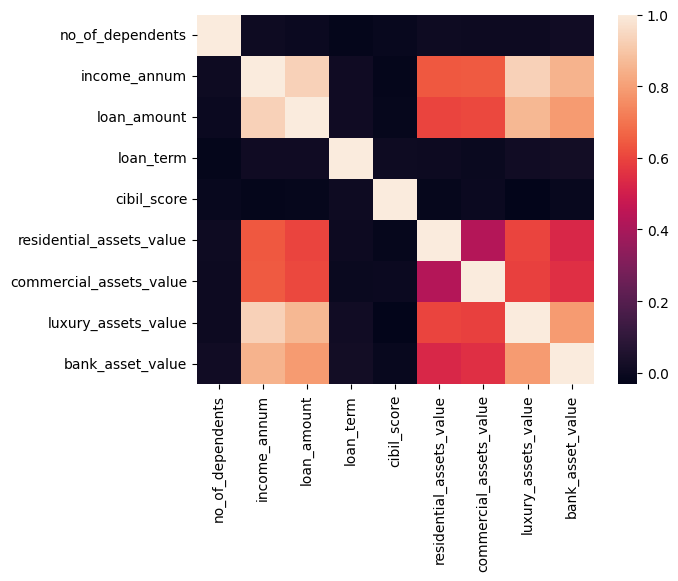

In [36]:
sns.heatmap(df[numerical].corr())

<Axes: >

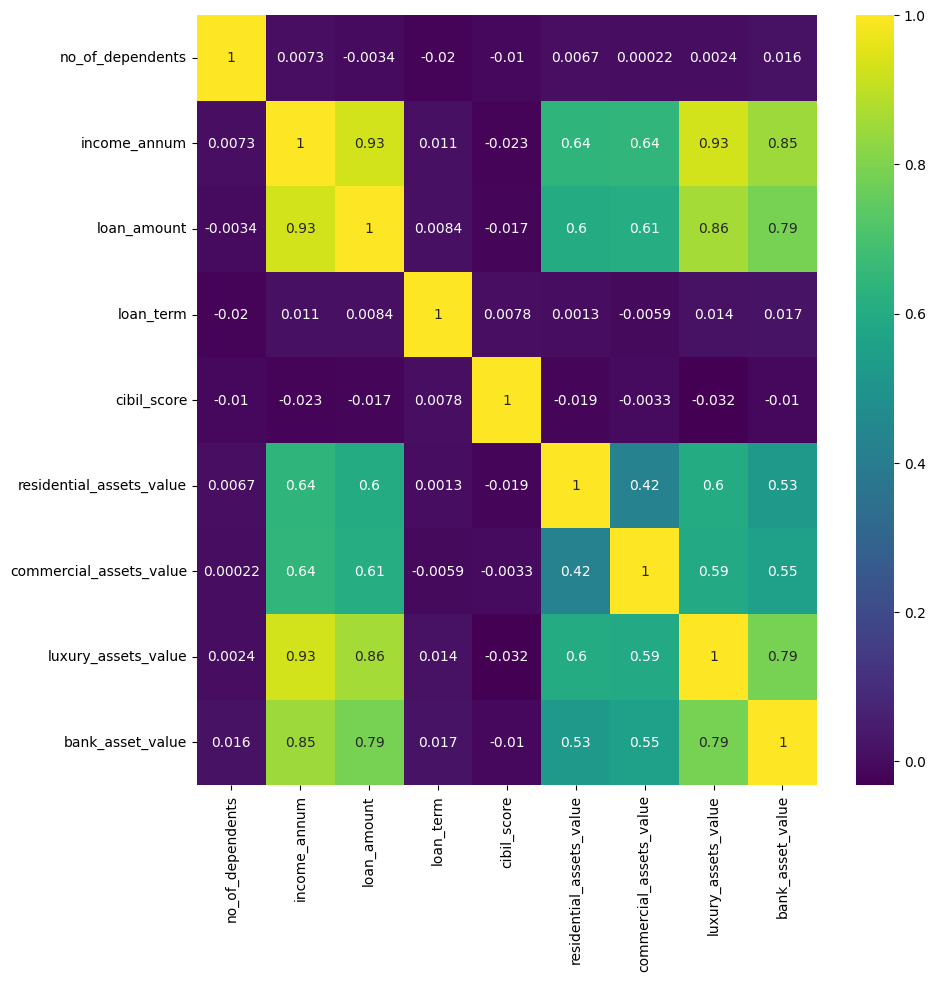

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numerical].corr(),annot=True,cmap='viridis')

<Axes: ylabel='income_annum'>

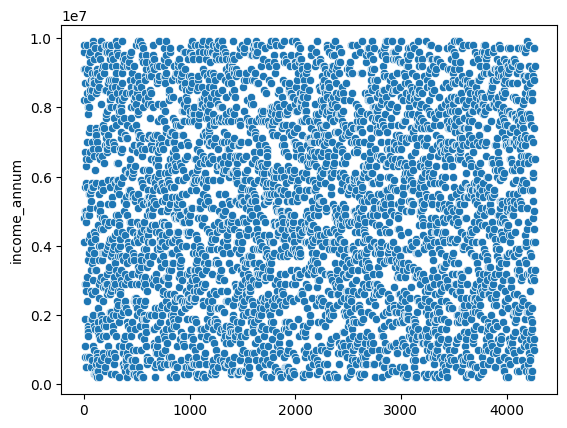

In [38]:
sns.scatterplot(df['income_annum'])

In [39]:
numerical

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

<Axes: xlabel='income_annum', ylabel='luxury_assets_value'>

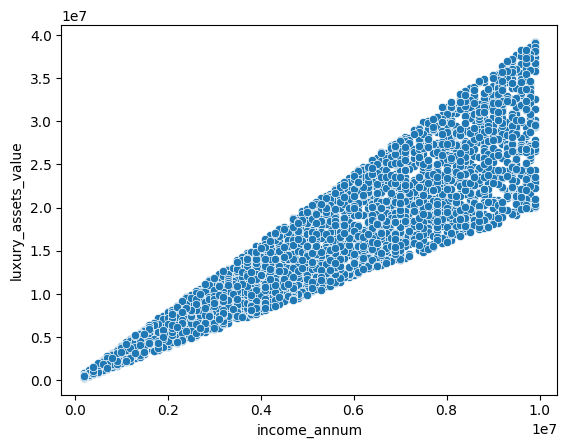

In [40]:
sns.scatterplot(df,x='income_annum',y='luxury_assets_value')

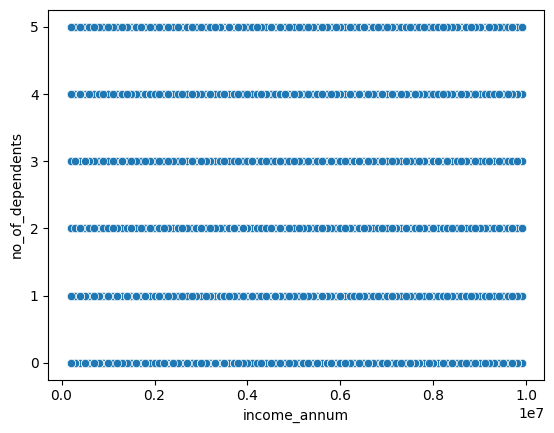

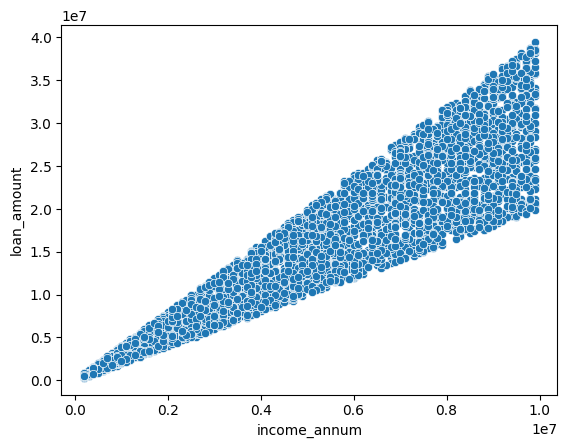

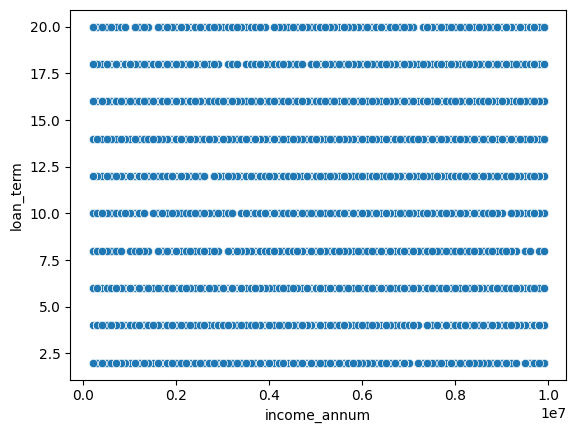

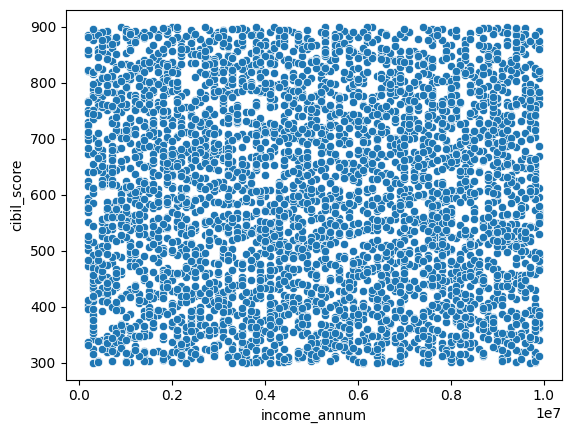

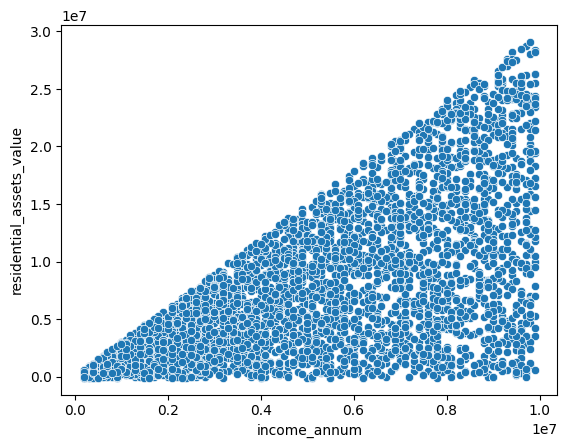

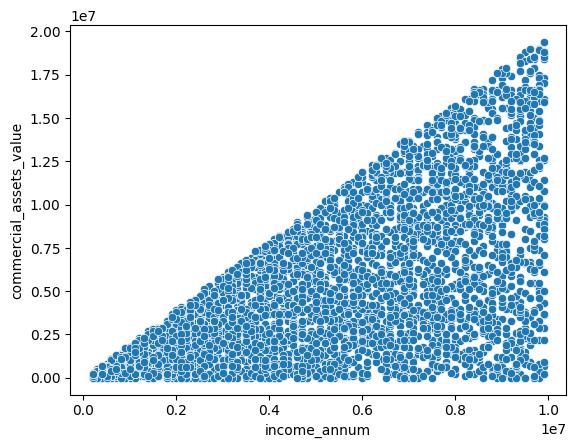

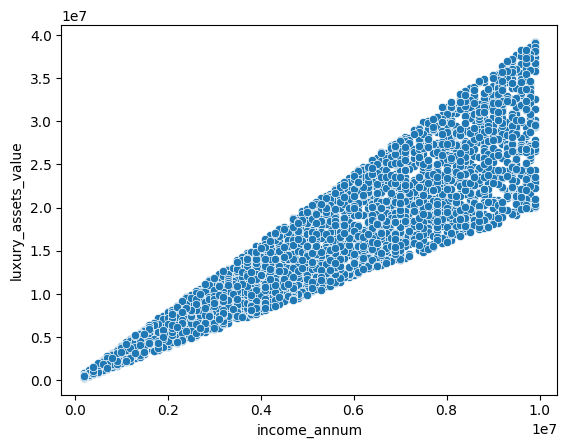

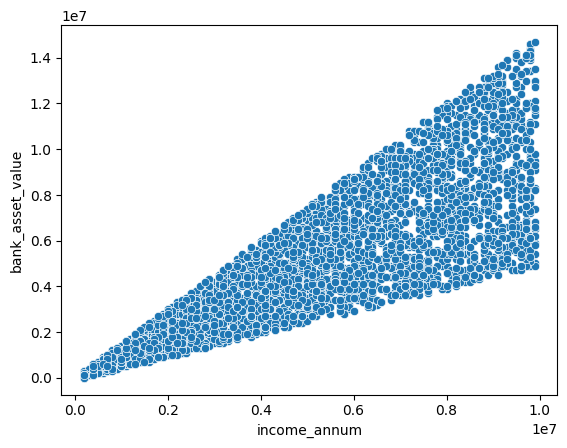

In [41]:
for col in numerical:
    if col!='income_annum':
        plt.figure()
        sns.scatterplot(df,x='income_annum',y=col)

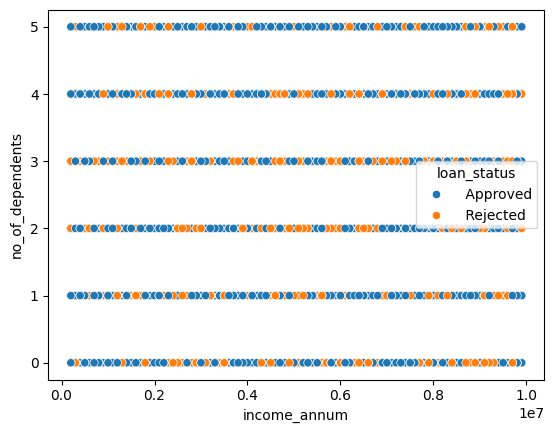

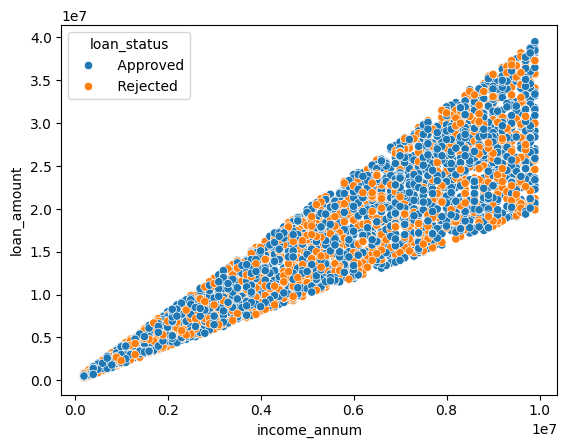

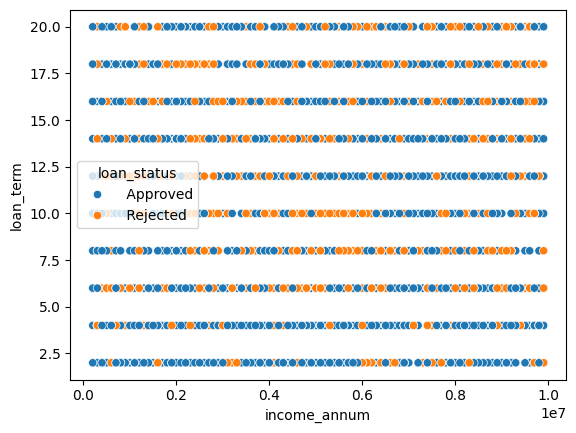

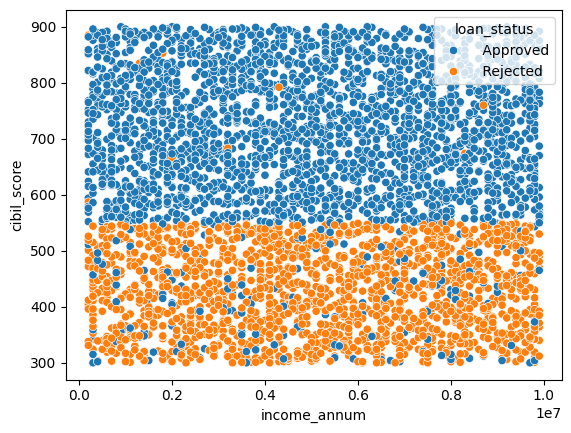

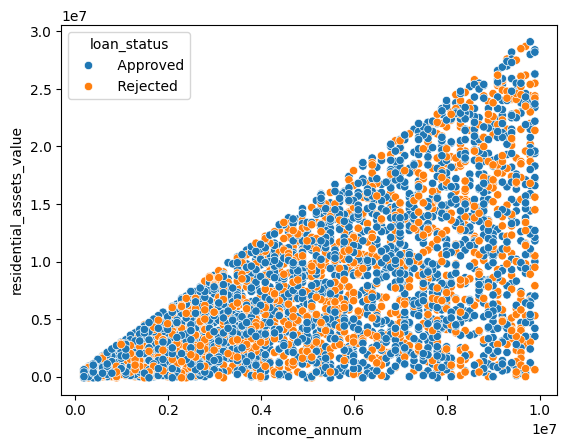

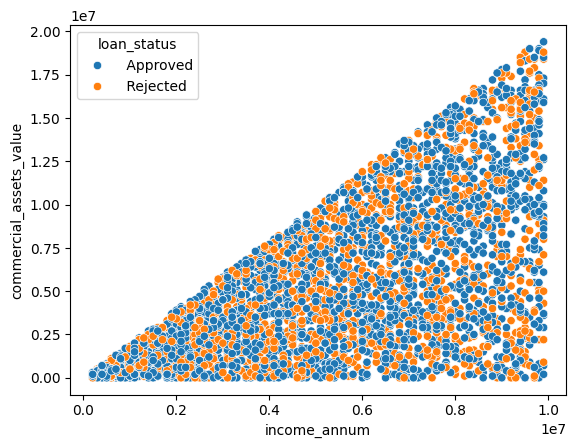

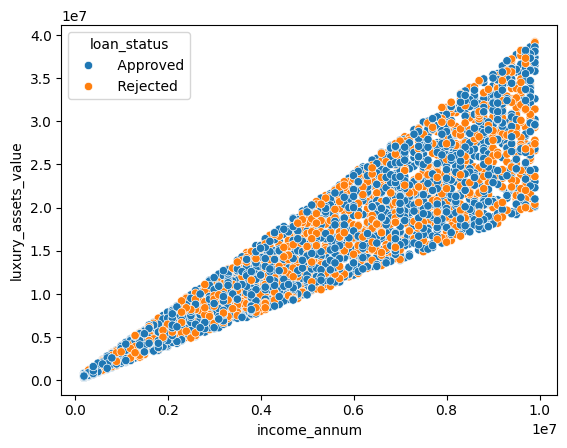

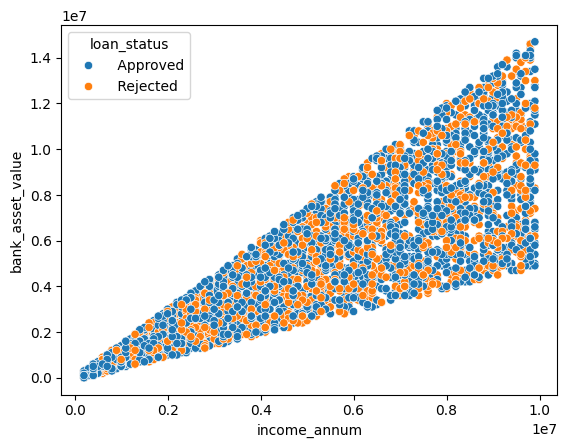

In [42]:
for col in numerical:
    if col!='income_annum':
        plt.figure()
        sns.scatterplot(df,x='income_annum',y=col,hue='loan_status')

<Axes: xlabel='income_annum', ylabel='cibil_score'>

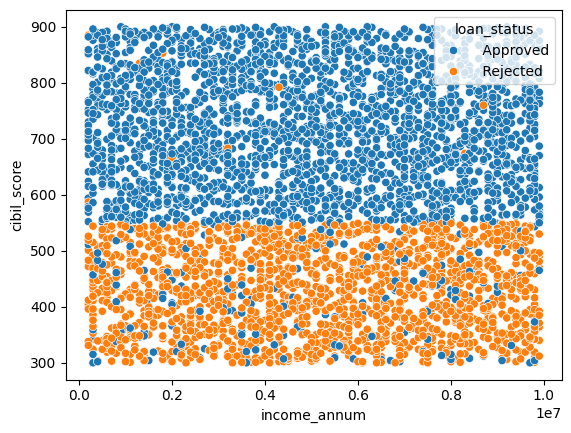

In [43]:
sns.scatterplot(df,x='income_annum',y='cibil_score',hue='loan_status')

In [44]:
df[categorical] = df[categorical].apply(lambda x: x.str.strip())

In [45]:
df[df['loan_status']=='Approved']

no_of_dependents     education self_employed  income_annum  loan_amount  \
0                    2           NaN            No       9600000     29900000   
6                    5      Graduate            No       8700000     33000000   
8                    0      Graduate           Yes        800000      2200000   
10                   4           NaN           Yes       2900000     11200000   
13                   2      Graduate           Yes       9100000     31500000   
...                ...           ...           ...           ...          ...   
4261                 3      Graduate           Yes       3000000      7500000   
4263                 3      Graduate            No       5000000     12700000   
4265                 0  Not Graduate           Yes       3300000     11300000   
4267                 1  Not Graduate            No       4100000     12800000   
4268                 1      Graduate           NaN       9200000     29700000   

      loan_term  cibil_score  residential_assets_value  \
0            12          778                 2400000.0   
6             4          678                22500000.0   
8            20          782                 1300000.0   
10            2          547                 8100000.0   
13           14          679                10800000.0   
...         ...          ...                       ...   
4261          6          881                 1400000.0   
4263         14          865                 4700000.0   
4265         20          559                 4200000.0   
4267          8          780                 8200000.0   
4268         10          607                       NaN   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                  17600000.0                  NaN         8000000.0   
6                  14800000.0           29200000.0         4300000.0   
8                    800000.0            2800000.0          600000.0   
10                  4700000.0            9500000.0         3100000.0   
13                 16600000.0           20900000.0         5000000.0   
...                       ...                  ...               ...   
4261                4500000.0            6100000.0         2300000.0   
4263                8100000.0           19500000.0         6300000.0   
4265                2900000.0           11000000.0         1900000.0   
4267                 700000.0           14100000.0         5800000.0   
4268               11800000.0           35700000.0        12000000.0   

     loan_status  
0       Approved  
6       Approved  
8       Approved  
10      Approved  
13      Approved  
...          ...  
4261    Approved  
4263    Approved  
4265    Approved  
4267    Approved  
4268    Approved  

[2656 rows x 12 columns]

<Axes: xlabel='income_annum', ylabel='cibil_score'>

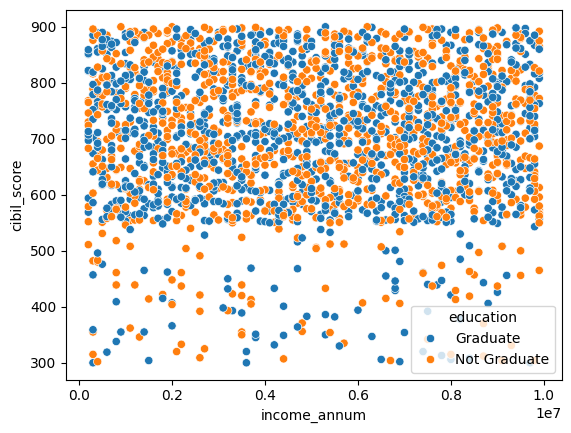

In [46]:
sns.scatterplot(df[df['loan_status']=='Approved'],x='income_annum',y='cibil_score',hue='education')

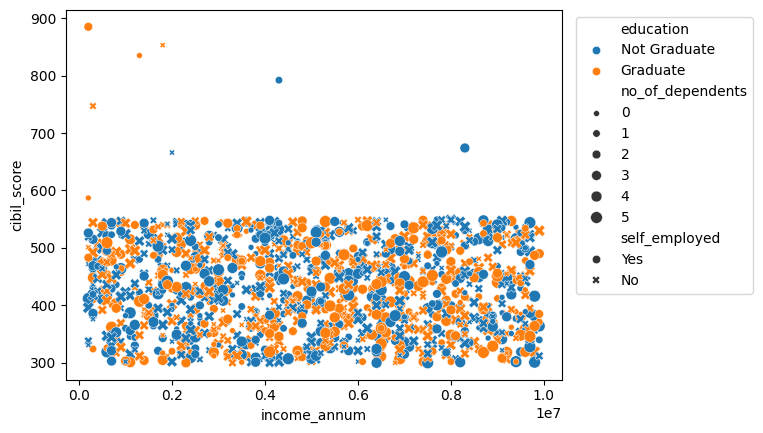

In [47]:
sns.scatterplot(df[df['loan_status']=='Rejected'],x='income_annum',
                y='cibil_score',hue='education',style='self_employed',size='no_of_dependents')

plt.legend(bbox_to_anchor=(1.4,1))